### Домашнее задание <a class="anchor" id="hw"></a><center>

In [ ]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

**1. Обучить любую модель классификации на датасете IRIS до применения PCA и после него. Сравнить качество классификации по отложенной выборке.**

In [ ]:
# Загрузим игрушечный датасет из sklearn
iris = datasets.load_iris()
X = iris.data
X.shape

(150, 4)

In [ ]:
def standard_scale(x):
    res = (x - x.mean(axis=0)) / x.std(axis=0)
    return res


X = standard_scale(X)

**2. *Написать свою реализацию метода главных компонент с помощью сингулярного разложения с использованием функции [numpy.linalg.svd()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.svd.html)**

Сформулировав принцип реализации метода главных компонент, нельзя не заметить его родство с сингулярным разложением матриц (SVD). Вспомним, что сингулярное разложение матрицы - это разложение вида

$$X=UDV^{T},$$

- столбцы ортогональной матрицы $U$ - это собственные векторы матрицы $XX^{T}$
- столбцы ортогональной матрицы $V$ - собственные векторы матрицы $X^{T}X$
- на главной диагонали диагональной матрицы $D$ расположены собственные значения матриц $XX^{T}$ и $X^{T}X$ (они равны и также называются сингулярными числами матрицы $X$).

Если число новых признаков $d$ равно старому числу признаков $n$, то можно приравнять разложения

$$X=ZW=UDV^{T}.$$

При этом матрицы $W$ и $V^{T}$ состоят из собственных векторов матрицы $X^{T}X$, то есть они равны при $Z=UD$.

In [ ]:
U, D, V = np.linalg.svd(X.T @ X)
U.shape, D.shape, V.shape

((4, 4), (4,), (4, 4))

In [ ]:
D

array([437.77467248, 137.10457072,  22.01353134,   3.10722546])

In [ ]:
# сформируем список кортежей (собственное значение, собственный вектор)
eig_pairs = [(D[i], V[i]) for i in range(len(D))]

# и отсортируем список по убыванию собственных значений
eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('Собственные значения и собственные векторы в порядке убывания:')
for i in eig_pairs:
    print(i)

Собственные значения и собственные векторы в порядке убывания:
(437.77467247979934, array([-0.52106591,  0.26934744, -0.5804131 , -0.56485654]))
(137.10457072021043, array([-0.37741762, -0.92329566, -0.02449161, -0.06694199]))
(22.013531335697234, array([ 0.71956635, -0.24438178, -0.14212637, -0.63427274]))
(3.1072254642928363, array([ 0.26128628, -0.12350962, -0.80144925,  0.52359713]))


In [ ]:
eig_sum = sum(D)
var_exp = [(i / eig_sum) * 100 for i in sorted(D, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(f'Доля дисперсии, описвыаемая каждой из компонент \n{var_exp}')

# а теперь оценим кумулятивную (то есть накапливаемую) дисперсию при учитывании каждой из компонент
print(f'Кумулятивная доля дисперсии по компонентам \n{cum_var_exp}')

Доля дисперсии, описвыаемая каждой из компонент 
[72.9624454132999, 22.850761786701742, 3.668921889282873, 0.5178709107154728]
Кумулятивная доля дисперсии по компонентам 
[ 72.96244541  95.8132072   99.48212909 100.        ]


In [ ]:
# Сформируем вектор весов из собственных векторов, соответствующих первым двум главным компонентам
W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))

print(f'Матрица весов W:\n', W)

Матрица весов W:
 [[-0.52106591 -0.37741762]
 [ 0.26934744 -0.92329566]
 [-0.5804131  -0.02449161]
 [-0.56485654 -0.06694199]]


In [ ]:
# Сформируем новую матрицу "объекты-признаки"
Z = X.dot(W)
Z[:10]

array([[ 2.26470281, -0.4800266 ],
       [ 2.08096115,  0.67413356],
       [ 2.36422905,  0.34190802],
       [ 2.29938422,  0.59739451],
       [ 2.38984217, -0.64683538],
       [ 2.07563095, -1.48917752],
       [ 2.44402884, -0.0476442 ],
       [ 2.23284716, -0.22314807],
       [ 2.33464048,  1.11532768],
       [ 2.18432817,  0.46901356]])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit_transform(X)[:10]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356]])

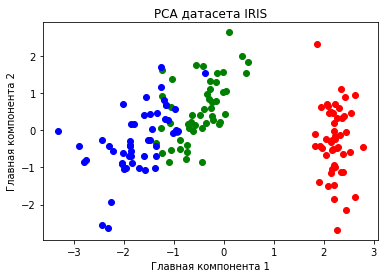

In [ ]:
plt.figure()
y = iris.target
for c, i in zip("rgb", [0, 1, 2]):
    plt.scatter(Z[y==i, 0], Z[y==i, 1], c=c)
plt.xlabel('Главная компонента 1')
plt.ylabel('Главная компонента 2')
plt.title('PCA датасета IRIS')
plt.show()